Obtain data from blackboard (stloan_risk.csv), convert it to a dataframe. 

In [1]:
# Mount the Google drive
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [2]:
# Get the data file
import pandas as pd
stloan = pd.read_csv('stloan_risk.csv',  header=0)
stloan.describe()


FileNotFoundError: [Errno 2] File stloan_risk.csv does not exist: 'stloan_risk.csv'

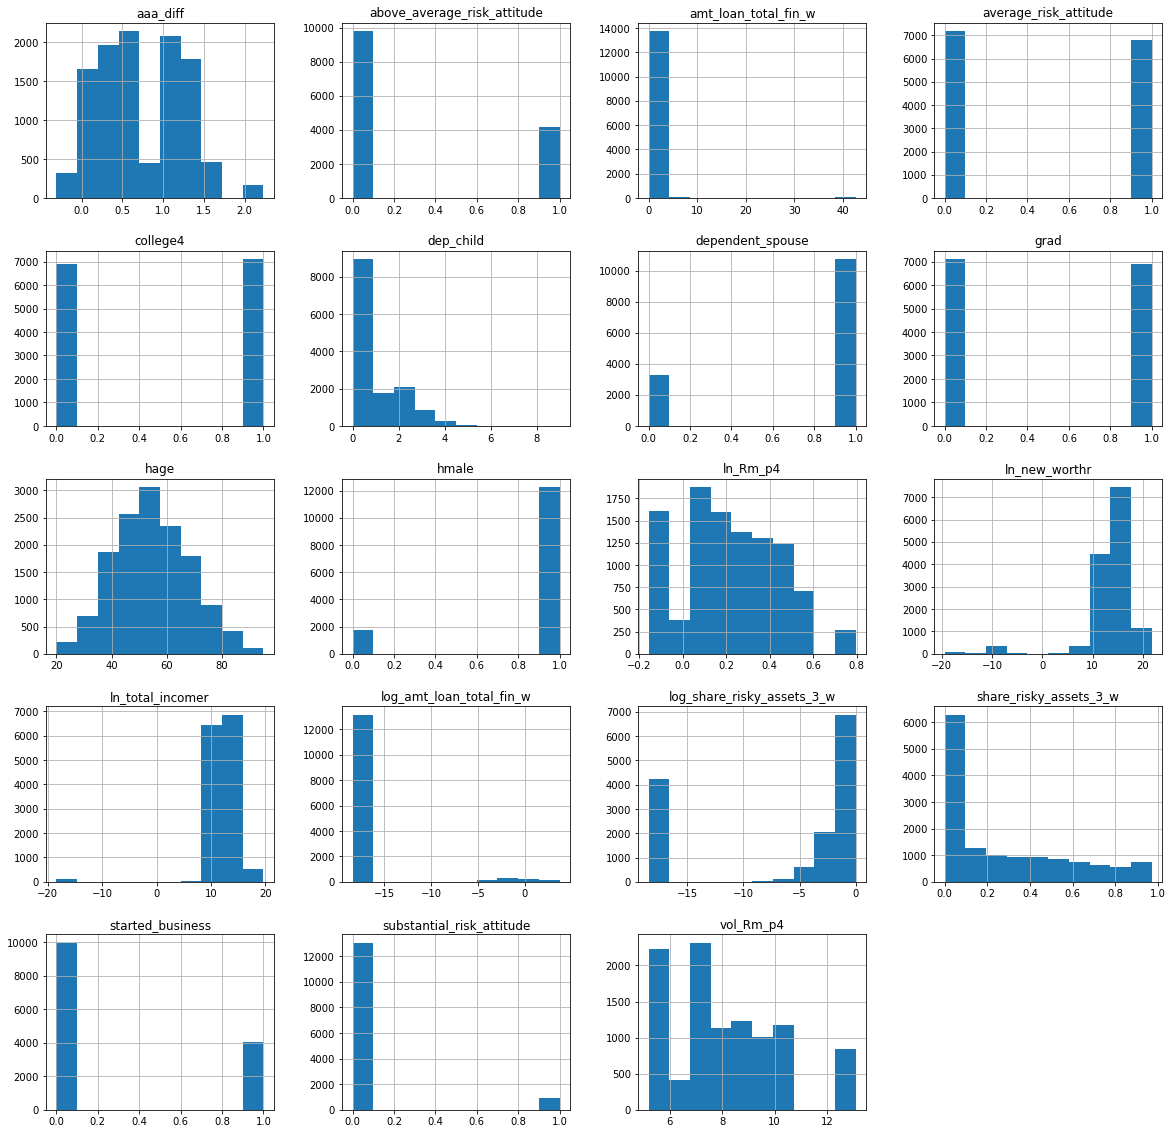

In [3]:
#Understand the data
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


stloan.hist(  figsize=(20,20))
plt.show()



2. Clean the data for regression analysis


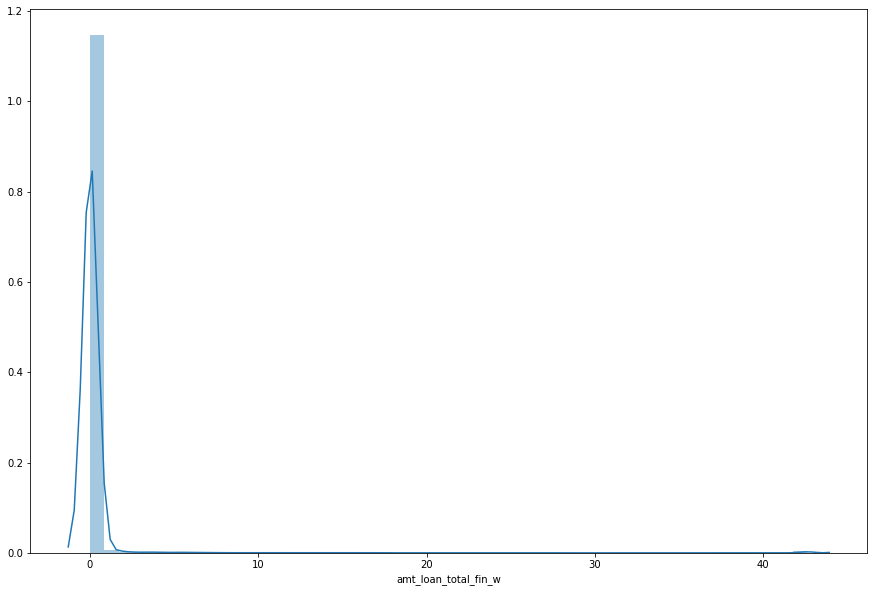

In [4]:
#Key dependent and independent variables
# Winsorize
#stloan['vol_w'] = st.mstats.winsorize(stloan['aaa_diff'],limits=0.05)
#stloan.hist( column='vol_w', figsize=(10,10))
#plt.show()

import seaborn as seabornInstance 


# Log transform
stloan['ln_stloan'] = np.log(.00000000000000000000000001 +  stloan['amt_loan_total_fin_w'])
#stloan.hist( column='amt_loan_total_fin_w', figsize=(10,10))
#stloan.hist( column='ln_stloan', figsize=(10,10))

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(stloan['amt_loan_total_fin_w'])
plt.show()


3. Run the regression analysis

In [5]:
#Define model
import statsmodels.api as sm

X = stloan[['log_amt_loan_total_fin_w','hage']].dropna()
y = stloan['log_share_risky_assets_3_w'].dropna()

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

# Correct for heteroscedasticity
results_robust = results.get_robustcov_results(cov_type='HC1')
print(results_robust.summary())

                                OLS Regression Results                                
Dep. Variable:     log_share_risky_assets_3_w   R-squared:                       0.054
Model:                                    OLS   Adj. R-squared:                  0.054
Method:                         Least Squares   F-statistic:                     395.0
Date:                        Mon, 05 Oct 2020   Prob (F-statistic):          1.40e-167
Time:                                12:53:06   Log-Likelihood:                -48126.
No. Observations:                       13924   AIC:                         9.626e+04
Df Residuals:                           13921   BIC:                         9.628e+04
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

4. Run the logit (logistic) analysis

In [6]:
#Define model
import statsmodels.api as sm
import numpy as np

stloan_clean = stloan.dropna()

X = stloan_clean[['log_amt_loan_total_fin_w','hage']].dropna()
y = stloan_clean['started_business'].dropna()

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.Logit(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())


# odds ratios only
print("Odds ratios are")
print(np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.600125
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       started_business   No. Observations:                10290
Model:                          Logit   Df Residuals:                    10287
Method:                           MLE   Df Model:                            2
Date:                Mon, 05 Oct 2020   Pseudo R-squ.:                 0.01179
Time:                        12:53:06   Log-Likelihood:                -6175.3
converged:                       True   LL-Null:                       -6248.9
Covariance Type:            nonrobust   LLR p-value:                 1.039e-32
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.3813      0.135    -17.623      0.000      -2.646

# Model prediction
# 1. OLS regression

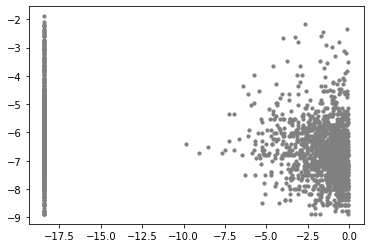

Mean Absolute Error: 7.54441725699663
Mean Squared Error: 71.22840825027383
Root Mean Squared Error: 8.4396924262839


,dependent_spouse,hmale,hage,dep_child,started_business,average_risk_attitude,above_average_risk_attitude,substantial_risk_attitude,college4,grad,ln_total_incomer,log_amt_loan_total_fin_w,amt_loan_total_fin_w,ln_new_worthr,log_share_risky_assets_3_w,share_risky_assets_3_w,ln_Rm_p4,vol_Rm_p4,aaa_diff,ln_stloan
count,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000
mean,0.770262,0.878912,48.841108,0.933916,0.295821,0.479495,0.323324,0.068513,0.512051,0.487949,12.090447,-17.126246,0.367591,12.981266,-7.091459,0.252430,0.217831,8.104751,0.731554,-55.576061
std,0.420684,0.326246,10.158675,1.206176,0.456433,0.499604,0.467768,0.252637,0.499879,0.499879,3.645315,4.678078,3.188171,5.620180,8.022018,0.293648,0.219175,2.079555,0.544821,15.384083
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.420680,-18.420680,0.000000,-18.878150,-18.420680,0.000000,-0.157419,5.198323,-0.310000,-59.867212
25%,1.000000,1.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.292770,-18.420680,0.000000,12.336295,-18.420680,0.000000,0.088513,6.768715,0.250000,-59.867212
50%,1.000000,1.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.061250,-18.420680,0.000000,13.946605,-2.120103,0.120019,0.197510,7.892920,0.510000,-59.867212
75%,1.000000,1.000000,56.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,13.340825,-18.420680,0.000000,15.663263,-0.781675,0.457639,0.362422,9.446041,1.180000,-59.867212
max,1.000000,1.000000,72.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.628930,3.752231,42.616040,21.001660,-0.029947,0.970497,0.795920,13.088560,2.230000,3.752231


In [7]:
 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

import statsmodels.api as sm
stloan = stloan.dropna()
X = stloan[['log_amt_loan_total_fin_w','hage']].dropna()
y = stloan['log_share_risky_assets_3_w'].dropna()

# Add a constant to the independent value
X1 = sm.add_constant(X)

# Split the sample into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# make regression model 
model = sm.OLS(y_train, X_train)

# fit model and print results
results = model.fit()
#print(results.summary())

# Correct for heteroscedasticity
results_robust = results.get_robustcov_results(cov_type='HC1')
#print(results_robust.summary())
 
y_pred = results_robust.predict(X_test)

y_test.head()
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()
df.describe()
#print(df)
plt.scatter(df["Actual"], df["Predicted"],  color='gray', s=10)
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

stloan.describe()

# 2. Logit model predictions

In [8]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


%matplotlib inline


stloan_clean = stloan.dropna()

X = stloan_clean[['log_amt_loan_total_fin_w','hage']].dropna()
y = stloan_clean['started_business'].dropna()

# Add a constant to the independent value
X1 = sm.add_constant(X)


# Split the sample into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# make regression model 
model = sm.Logit(y_train, X_train)

# fit model and print results
results = model.fit()
print(results.summary())


# odds ratios only
print("Odds ratios are")
print(np.exp(results.params))


# Predict outcomes
prob_pred = results.predict(X_test)
#print(prob_pred)


y_pred = [ 0 if x < 0.25 else 1 for x in prob_pred]

#print(y_pred)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted prob':prob_pred })
df.head()


print(confusion_matrix(df["Actual"], df["Predicted"]))


confusion_df = pd.DataFrame(confusion_matrix(df["Actual"], df["Predicted"]),
             columns=["Predicted group " + str(cat) for cat in [0,1]],
             index = ["Actual group " + str(cat) for cat in [0,1]])

print(confusion_df.head())
print(" ")
print(" ")
print(classification_report(df["Actual"], df["Predicted"], digits=3))
print(" ")
print(" ")
print("Accuracy score is")
print(accuracy_score(df["Actual"], df["Predicted"]))
print(" ")
print(" ")

Optimization terminated successfully.
         Current function value: 0.619485
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       started_business   No. Observations:                 8232
Model:                          Logit   Df Residuals:                     8230
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Oct 2020   Pseudo R-squ.:                -0.01802
Time:                        12:53:07   Log-Likelihood:                -5099.6
converged:                       True   LL-Null:                       -5009.3
Covariance Type:            nonrobust   LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
log_amt_loan_total_fin_w     0.0083      0.005      1.736      0.083      -0.001

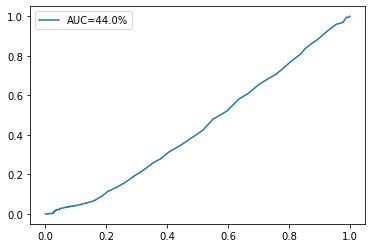

In [9]:
# AUC curve and ROC

fpr, tpr, t= metrics.roc_curve(y_test, prob_pred)
auc = metrics.roc_auc_score(y_test,prob_pred)
plt.plot(fpr,tpr,label="AUC="+str(100*round(auc,2))+"%")
plt.legend()
plt.show()






